In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as stats
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("C:\\Users\\GOVIND SINGH\\Downloads\\2021_Green_Taxi_Trip_Data.csv")
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2.0,01/01/2021 12:15:56 AM,01/01/2021 12:19:52 AM,N,1.0,43,151,1.0,1.01,5.50,0.5,0.5,0.00,0.0,NaN,0.3,6.80,2.0,1.0,0.00
1,2.0,01/01/2021 12:25:59 AM,01/01/2021 12:34:44 AM,N,1.0,166,239,1.0,2.53,10.00,0.5,0.5,2.81,0.0,NaN,0.3,16.86,1.0,1.0,2.75
2,2.0,01/01/2021 12:45:57 AM,01/01/2021 12:51:55 AM,N,1.0,41,42,1.0,1.12,6.00,0.5,0.5,1.00,0.0,NaN,0.3,8.30,1.0,1.0,0.00
3,2.0,12/31/2020 11:57:51 PM,01/01/2021 12:04:56 AM,N,1.0,168,75,1.0,1.99,8.00,0.5,0.5,0.00,0.0,NaN,0.3,9.30,2.0,1.0,0.00
4,2.0,01/01/2021 12:16:36 AM,01/01/2021 12:16:40 AM,N,2.0,265,265,3.0,0.00,-52.00,0.0,-0.5,0.00,0.0,NaN,-0.3,-52.80,3.0,1.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1068750,2.0,12/31/2021 11:54:00 PM,01/01/2022 12:19:00 AM,NaN,NaN,77,93,NaN,10.81,48.90,0.0,0.0,0.00,0.0,NaN,0.3,49.20,NaN,NaN,NaN
1068751,2.0,12/31/2021 11:37:00 PM,12/31/2021 11:56:00 PM,NaN,NaN,189,4,NaN,4.65,22.34,0.0,0.0,3.00,0.0,NaN,0.3,28.39,NaN,NaN,NaN
1068752,2.0,12/31/2021 11:59:00 PM,01/01/2022 12:16:00 AM,NaN,NaN,41,137,NaN,6.70,24.18,0.0,0.0,6.00,0.0,NaN,0.3,33.23,NaN,NaN,NaN
1068753,2.0,12/31/2021 11:08:00 PM,12/31/2021 11:29:00 PM,NaN,NaN,97,262,NaN,10.38,35.08,0.0,0.0,8.42,0.0,NaN,0.3,46.55,NaN,NaN,NaN


In [5]:
df.shape

(1068755, 20)

In [7]:
df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2.0,01/01/2021 12:15:56 AM,01/01/2021 12:19:52 AM,N,1.0,43,151,1.0,1.01,5.5,0.5,0.5,0.00,0.0,NaN,0.3,6.80,2.0,1.0,0.00
1,2.0,01/01/2021 12:25:59 AM,01/01/2021 12:34:44 AM,N,1.0,166,239,1.0,2.53,10.0,0.5,0.5,2.81,0.0,NaN,0.3,16.86,1.0,1.0,2.75
2,2.0,01/01/2021 12:45:57 AM,01/01/2021 12:51:55 AM,N,1.0,41,42,1.0,1.12,6.0,0.5,0.5,1.00,0.0,NaN,0.3,8.30,1.0,1.0,0.00
3,2.0,12/31/2020 11:57:51 PM,01/01/2021 12:04:56 AM,N,1.0,168,75,1.0,1.99,8.0,0.5,0.5,0.00,0.0,NaN,0.3,9.30,2.0,1.0,0.00
4,2.0,01/01/2021 12:16:36 AM,01/01/2021 12:16:40 AM,N,2.0,265,265,3.0,0.00,-52.0,0.0,-0.5,0.00,0.0,NaN,-0.3,-52.80,3.0,1.0,0.00


In [9]:
df.tail()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
1068750,2.0,12/31/2021 11:54:00 PM,01/01/2022 12:19:00 AM,NaN,NaN,77,93,NaN,10.81,48.90,0.0,0.0,0.00,0.0,NaN,0.3,49.20,NaN,NaN,NaN
1068751,2.0,12/31/2021 11:37:00 PM,12/31/2021 11:56:00 PM,NaN,NaN,189,4,NaN,4.65,22.34,0.0,0.0,3.00,0.0,NaN,0.3,28.39,NaN,NaN,NaN
1068752,2.0,12/31/2021 11:59:00 PM,01/01/2022 12:16:00 AM,NaN,NaN,41,137,NaN,6.70,24.18,0.0,0.0,6.00,0.0,NaN,0.3,33.23,NaN,NaN,NaN
1068753,2.0,12/31/2021 11:08:00 PM,12/31/2021 11:29:00 PM,NaN,NaN,97,262,NaN,10.38,35.08,0.0,0.0,8.42,0.0,NaN,0.3,46.55,NaN,NaN,NaN
1068754,2.0,12/31/2021 11:46:00 PM,12/31/2021 11:57:00 PM,NaN,NaN,168,60,NaN,2.53,13.20,0.0,0.0,0.00,0.0,NaN,0.3,13.50,NaN,NaN,NaN


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068755 entries, 0 to 1068754
Data columns (total 20 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   VendorID               819640 non-null   float64
 1   lpep_pickup_datetime   1068755 non-null  object 
 2   lpep_dropoff_datetime  1068755 non-null  object 
 3   store_and_fwd_flag     656321 non-null   object 
 4   RatecodeID             656321 non-null   float64
 5   PULocationID           1068755 non-null  int64  
 6   DOLocationID           1068755 non-null  int64  
 7   passenger_count        656321 non-null   float64
 8   trip_distance          1068755 non-null  float64
 9   fare_amount            1068755 non-null  float64
 10  extra                  1068755 non-null  float64
 11  mta_tax                1068755 non-null  float64
 12  tip_amount             1068755 non-null  float64
 13  tolls_amount           1068755 non-null  float64
 14  ehail_fee         

In [13]:
df1 = df.copy()
df1

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2.0,01/01/2021 12:15:56 AM,01/01/2021 12:19:52 AM,N,1.0,43,151,1.0,1.01,5.50,0.5,0.5,0.00,0.0,NaN,0.3,6.80,2.0,1.0,0.00
1,2.0,01/01/2021 12:25:59 AM,01/01/2021 12:34:44 AM,N,1.0,166,239,1.0,2.53,10.00,0.5,0.5,2.81,0.0,NaN,0.3,16.86,1.0,1.0,2.75
2,2.0,01/01/2021 12:45:57 AM,01/01/2021 12:51:55 AM,N,1.0,41,42,1.0,1.12,6.00,0.5,0.5,1.00,0.0,NaN,0.3,8.30,1.0,1.0,0.00
3,2.0,12/31/2020 11:57:51 PM,01/01/2021 12:04:56 AM,N,1.0,168,75,1.0,1.99,8.00,0.5,0.5,0.00,0.0,NaN,0.3,9.30,2.0,1.0,0.00
4,2.0,01/01/2021 12:16:36 AM,01/01/2021 12:16:40 AM,N,2.0,265,265,3.0,0.00,-52.00,0.0,-0.5,0.00,0.0,NaN,-0.3,-52.80,3.0,1.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1068750,2.0,12/31/2021 11:54:00 PM,01/01/2022 12:19:00 AM,NaN,NaN,77,93,NaN,10.81,48.90,0.0,0.0,0.00,0.0,NaN,0.3,49.20,NaN,NaN,NaN
1068751,2.0,12/31/2021 11:37:00 PM,12/31/2021 11:56:00 PM,NaN,NaN,189,4,NaN,4.65,22.34,0.0,0.0,3.00,0.0,NaN,0.3,28.39,NaN,NaN,NaN
1068752,2.0,12/31/2021 11:59:00 PM,01/01/2022 12:16:00 AM,NaN,NaN,41,137,NaN,6.70,24.18,0.0,0.0,6.00,0.0,NaN,0.3,33.23,NaN,NaN,NaN
1068753,2.0,12/31/2021 11:08:00 PM,12/31/2021 11:29:00 PM,NaN,NaN,97,262,NaN,10.38,35.08,0.0,0.0,8.42,0.0,NaN,0.3,46.55,NaN,NaN,NaN


# Changing the data type of the columns 

In [15]:
df1["lpep_pickup_datetime"] = pd.to_datetime(df1["lpep_pickup_datetime"])
df1["lpep_dropoff_datetime"] = pd.to_datetime(df1["lpep_dropoff_datetime"])

In [17]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068755 entries, 0 to 1068754
Data columns (total 20 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   VendorID               819640 non-null   float64       
 1   lpep_pickup_datetime   1068755 non-null  datetime64[ns]
 2   lpep_dropoff_datetime  1068755 non-null  datetime64[ns]
 3   store_and_fwd_flag     656321 non-null   object        
 4   RatecodeID             656321 non-null   float64       
 5   PULocationID           1068755 non-null  int64         
 6   DOLocationID           1068755 non-null  int64         
 7   passenger_count        656321 non-null   float64       
 8   trip_distance          1068755 non-null  float64       
 9   fare_amount            1068755 non-null  float64       
 10  extra                  1068755 non-null  float64       
 11  mta_tax                1068755 non-null  float64       
 12  tip_amount             10687

# Adding a new column duration 

In [19]:
df1["duration"] = df1["lpep_dropoff_datetime"] - df1["lpep_pickup_datetime"]
df1.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,duration
0,2.0,2021-01-01 00:15:56,2021-01-01 00:19:52,N,1.0,43,151,1.0,1.01,5.5,...,0.5,0.00,0.0,NaN,0.3,6.80,2.0,1.0,0.00,0 days 00:03:56
1,2.0,2021-01-01 00:25:59,2021-01-01 00:34:44,N,1.0,166,239,1.0,2.53,10.0,...,0.5,2.81,0.0,NaN,0.3,16.86,1.0,1.0,2.75,0 days 00:08:45
2,2.0,2021-01-01 00:45:57,2021-01-01 00:51:55,N,1.0,41,42,1.0,1.12,6.0,...,0.5,1.00,0.0,NaN,0.3,8.30,1.0,1.0,0.00,0 days 00:05:58
3,2.0,2020-12-31 23:57:51,2021-01-01 00:04:56,N,1.0,168,75,1.0,1.99,8.0,...,0.5,0.00,0.0,NaN,0.3,9.30,2.0,1.0,0.00,0 days 00:07:05
4,2.0,2021-01-01 00:16:36,2021-01-01 00:16:40,N,2.0,265,265,3.0,0.00,-52.0,...,-0.5,0.00,0.0,NaN,-0.3,-52.80,3.0,1.0,0.00,0 days 00:00:04


In [21]:
df1["duration"] = df1["duration"].dt.total_seconds()/60
df1.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,duration
0,2.0,2021-01-01 00:15:56,2021-01-01 00:19:52,N,1.0,43,151,1.0,1.01,5.5,...,0.5,0.00,0.0,NaN,0.3,6.80,2.0,1.0,0.00,3.933333
1,2.0,2021-01-01 00:25:59,2021-01-01 00:34:44,N,1.0,166,239,1.0,2.53,10.0,...,0.5,2.81,0.0,NaN,0.3,16.86,1.0,1.0,2.75,8.750000
2,2.0,2021-01-01 00:45:57,2021-01-01 00:51:55,N,1.0,41,42,1.0,1.12,6.0,...,0.5,1.00,0.0,NaN,0.3,8.30,1.0,1.0,0.00,5.966667
3,2.0,2020-12-31 23:57:51,2021-01-01 00:04:56,N,1.0,168,75,1.0,1.99,8.0,...,0.5,0.00,0.0,NaN,0.3,9.30,2.0,1.0,0.00,7.083333
4,2.0,2021-01-01 00:16:36,2021-01-01 00:16:40,N,2.0,265,265,3.0,0.00,-52.0,...,-0.5,0.00,0.0,NaN,-0.3,-52.80,3.0,1.0,0.00,0.066667


# Selecting the specific columns from the whole dataset which are useful for us 

In [23]:
df1 = df1[["passenger_count","trip_distance","fare_amount","tip_amount","total_amount","payment_type","duration"]]
df1.head()

,passenger_count,trip_distance,fare_amount,tip_amount,total_amount,payment_type,duration
0,1.0,1.01,5.5,0.00,6.80,2.0,3.933333
1,1.0,2.53,10.0,2.81,16.86,1.0,8.750000
2,1.0,1.12,6.0,1.00,8.30,1.0,5.966667
3,1.0,1.99,8.0,0.00,9.30,2.0,7.083333
4,3.0,0.00,-52.0,0.00,-52.80,3.0,0.066667


In [25]:
df1.isnull().sum()

passenger_count    412434
trip_distance           0
fare_amount             0
tip_amount              0
total_amount            0
payment_type       412434
duration                0
dtype: int64

In [27]:
percentage_of_null = (412434/len(df1))*100
percentage_of_null

38.590135250829235

In [29]:
df1.dropna(inplace=True)

In [31]:
df1

,passenger_count,trip_distance,fare_amount,tip_amount,total_amount,payment_type,duration
0,1.0,1.01,5.5,0.00,6.80,2.0,3.933333
1,1.0,2.53,10.0,2.81,16.86,1.0,8.750000
2,1.0,1.12,6.0,1.00,8.30,1.0,5.966667
3,1.0,1.99,8.0,0.00,9.30,2.0,7.083333
4,3.0,0.00,-52.0,0.00,-52.80,3.0,0.066667
...,...,...,...,...,...,...,...
1043516,1.0,7.68,26.0,0.00,27.30,2.0,25.000000
1043517,1.0,4.07,14.5,0.00,15.80,2.0,12.016667
1043518,1.0,8.36,24.5,0.00,28.55,2.0,16.950000
1043519,1.0,1.11,6.5,0.00,7.80,2.0,5.983333


In [33]:
df1["passenger_count"] = df1["passenger_count"].astype(int)
df1["payment_type"] = df1["payment_type"].astype(int)

In [35]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 656321 entries, 0 to 1043520
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   passenger_count  656321 non-null  int32  
 1   trip_distance    656321 non-null  float64
 2   fare_amount      656321 non-null  float64
 3   tip_amount       656321 non-null  float64
 4   total_amount     656321 non-null  float64
 5   payment_type     656321 non-null  int32  
 6   duration         656321 non-null  float64
dtypes: float64(5), int32(2)
memory usage: 35.1 MB


In [37]:
df1

,passenger_count,trip_distance,fare_amount,tip_amount,total_amount,payment_type,duration
0,1,1.01,5.5,0.00,6.80,2,3.933333
1,1,2.53,10.0,2.81,16.86,1,8.750000
2,1,1.12,6.0,1.00,8.30,1,5.966667
3,1,1.99,8.0,0.00,9.30,2,7.083333
4,3,0.00,-52.0,0.00,-52.80,3,0.066667
...,...,...,...,...,...,...,...
1043516,1,7.68,26.0,0.00,27.30,2,25.000000
1043517,1,4.07,14.5,0.00,15.80,2,12.016667
1043518,1,8.36,24.5,0.00,28.55,2,16.950000
1043519,1,1.11,6.5,0.00,7.80,2,5.983333


In [39]:
df1.drop_duplicates(inplace=True)

In [41]:
df1["payment_type"].value_counts(normalize=True)

payment_type
1    0.617927
2    0.374773
3    0.005569
4    0.001719
5    0.000011
Name: proportion, dtype: float64

In [43]:
df1["passenger_count"].value_counts()

passenger_count
1     529743
2      51036
5      12882
6      10019
3       8365
4       2925
0       1396
8         66
7         23
9          9
48         1
32         1
Name: count, dtype: int64

In [45]:
df1 = df1[df1["payment_type"]<3]
df1 = df1[(df1["passenger_count"]>0) & (df1["passenger_count"]<6)]

In [47]:
df1.shape

(600551, 7)

In [49]:
df1["payment_type"].replace([1,2],["card","cash"],inplace=True)

In [51]:
df1

,passenger_count,trip_distance,fare_amount,tip_amount,total_amount,payment_type,duration
0,1,1.01,5.5,0.00,6.80,cash,3.933333
1,1,2.53,10.0,2.81,16.86,card,8.750000
2,1,1.12,6.0,1.00,8.30,card,5.966667
3,1,1.99,8.0,0.00,9.30,cash,7.083333
5,3,0.00,52.0,0.00,52.80,cash,0.066667
...,...,...,...,...,...,...,...
1043516,1,7.68,26.0,0.00,27.30,cash,25.000000
1043517,1,4.07,14.5,0.00,15.80,cash,12.016667
1043518,1,8.36,24.5,0.00,28.55,cash,16.950000
1043519,1,1.11,6.5,0.00,7.80,cash,5.983333


# Summary statistics and dealing with outliers

In [53]:
df1.describe()

,passenger_count,trip_distance,fare_amount,tip_amount,total_amount,duration
count,600551.000000,600551.000000,600551.000000,600551.000000,600551.000000,600551.000000
mean,1.211985,4.462885,16.143015,1.497848,19.750301,25.195880
std,0.692972,343.551129,16.209602,2.795470,17.650516,99.929251
min,1.000000,0.000000,-3.500000,0.000000,-4.800000,-43.983333
25%,1.000000,1.210000,7.500000,0.000000,9.800000,7.816667
50%,1.000000,2.110000,11.000000,0.000000,14.460000,12.850000
75%,1.000000,4.110000,18.200000,2.360000,22.800000,21.250000
max,5.000000,244152.010000,2109.000000,400.000000,2113.550000,1439.850000


In [55]:
df1 = df1[df1["fare_amount"]>0]
df1= df1[df1["total_amount"]>0]
df1 = df1[df1["duration"]>0]

In [57]:
df1.describe()

,passenger_count,trip_distance,fare_amount,tip_amount,total_amount,duration
count,598189.000000,598189.000000,598189.000000,598189.000000,598189.000000,598189.000000
mean,1.212428,4.452921,16.191339,1.500735,19.805588,25.121130
std,0.693826,344.228032,16.191805,2.775041,17.628497,99.700531
min,1.000000,0.000000,0.010000,0.000000,0.010000,0.016667
25%,1.000000,1.210000,7.500000,0.000000,9.800000,7.833333
50%,1.000000,2.110000,11.000000,0.000000,14.460000,12.850000
75%,1.000000,4.100000,18.500000,2.360000,22.810000,21.216667
max,5.000000,244152.010000,2109.000000,400.000000,2113.550000,1439.850000


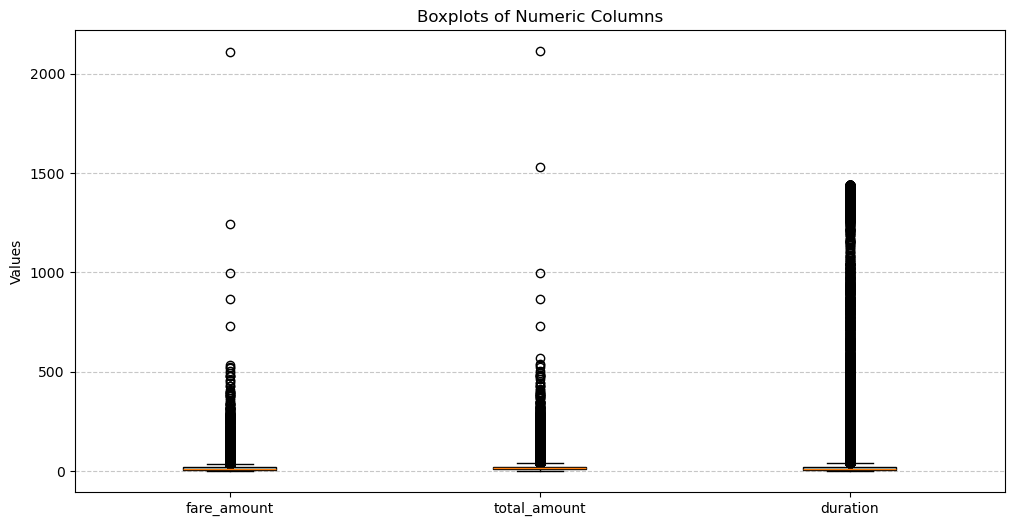

In [59]:
plt.figure(figsize=(12, 6))
columns = ['fare_amount', 'total_amount', 'duration']
plt.boxplot([df1[col] for col in columns], labels=columns, patch_artist=True, boxprops=dict(facecolor='skyblue'))

# Customizations
plt.title('Boxplots of Numeric Columns')
plt.ylabel('Values')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

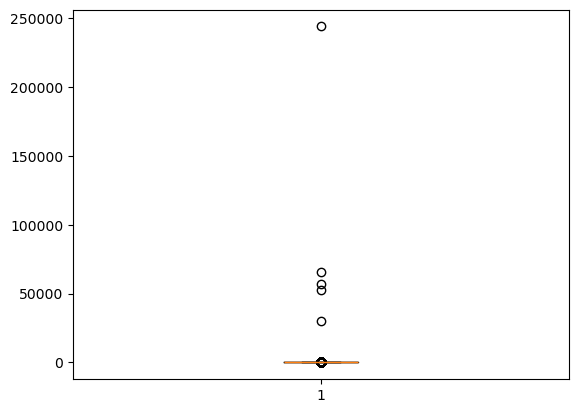

In [61]:
plt.boxplot(df1["trip_distance"])
plt.show()

# Using IQR method to deal with outliers

In [63]:
for col in ["fare_amount","trip_distance","total_amount","duration"]:
    q1 = df1[col].quantile(0.25)
    q3 = df1[col].quantile(0.75)
    IQR = q3 - q1

    lower_bound = q1 -1.5*IQR
    upper_bound = q3 +1.5*IQR

    df1 = df1[(df1[col]>=lower_bound) & (df1[col]<=upper_bound)]
    

In [65]:
df1

,passenger_count,trip_distance,fare_amount,tip_amount,total_amount,payment_type,duration
0,1,1.01,5.5,0.00,6.80,cash,3.933333
1,1,2.53,10.0,2.81,16.86,card,8.750000
2,1,1.12,6.0,1.00,8.30,card,5.966667
3,1,1.99,8.0,0.00,9.30,cash,7.083333
8,1,0.00,2.5,0.00,3.80,cash,0.183333
...,...,...,...,...,...,...,...
1043513,1,2.44,10.0,0.00,14.05,cash,9.366667
1043515,1,1.16,8.5,0.00,9.80,cash,10.116667
1043517,1,4.07,14.5,0.00,15.80,cash,12.016667
1043519,1,1.11,6.5,0.00,7.80,cash,5.983333


# DISTRIBUTION OF DATA

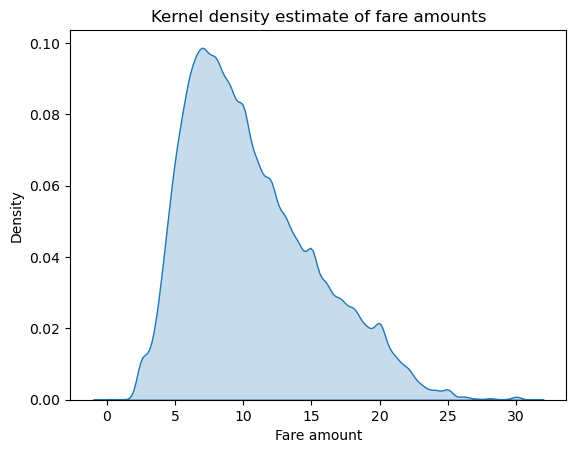

The mean of the fare amount: 20.135651117421666
From the above plot we can see that data is not normaly distributed


In [67]:
sns.kdeplot(df1["fare_amount"],shade=True)
plt.xlabel("Fare amount")
plt.ylabel("Density")
plt.title("Kernel density estimate of fare amounts")
plt.show()
print("The mean of the fare amount:",df["fare_amount"].mean())
print("From the above plot we can see that data is not normaly distributed")

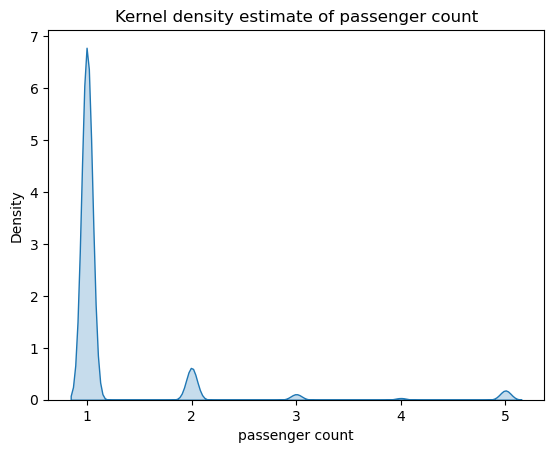

In [75]:
sns.kdeplot(df1["passenger_count"],shade=True)
plt.xlabel("passenger count")
plt.ylabel("Density")
plt.title("Kernel density estimate of passenger count")
plt.show()


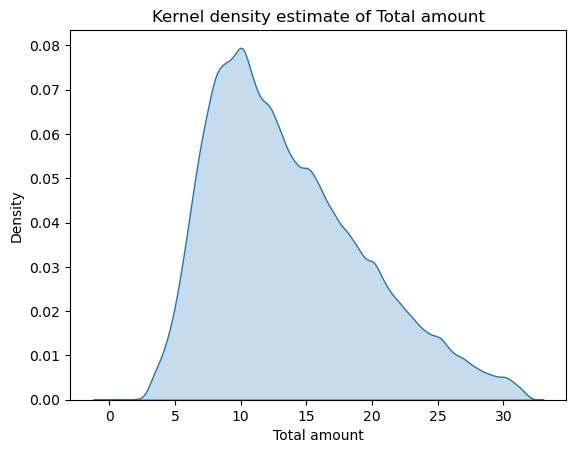

In [73]:
sns.kdeplot(df1["total_amount"],shade=True)
plt.xlabel("Total amount")
plt.ylabel("Density")
plt.title("Kernel density estimate of Total amount")
plt.show()


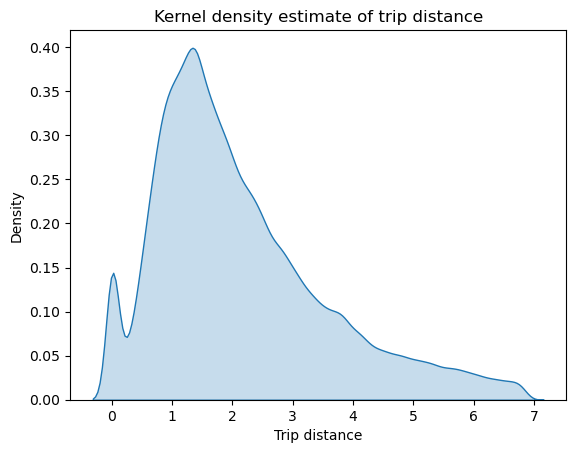

In [78]:
sns.kdeplot(df1["trip_distance"],shade=True)
plt.xlabel("Trip distance")
plt.ylabel("Density")
plt.title("Kernel density estimate of trip distance")
plt.show()


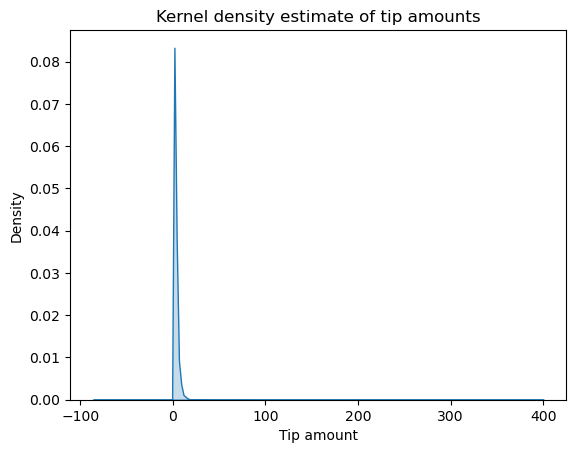

In [80]:
sns.kdeplot(df["tip_amount"],shade=True)
plt.xlabel("Tip amount")
plt.ylabel("Density")
plt.title("Kernel density estimate of tip amounts")
plt.show()


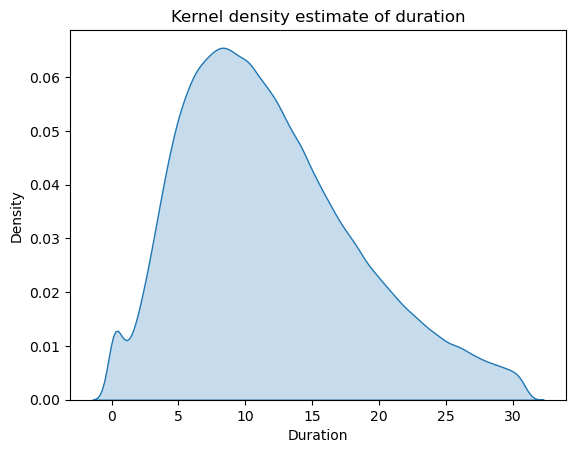

In [84]:
sns.kdeplot(df1["duration"],shade=True)
plt.xlabel("Duration")
plt.ylabel("Density")
plt.title("Kernel density estimate of duration")
plt.show()


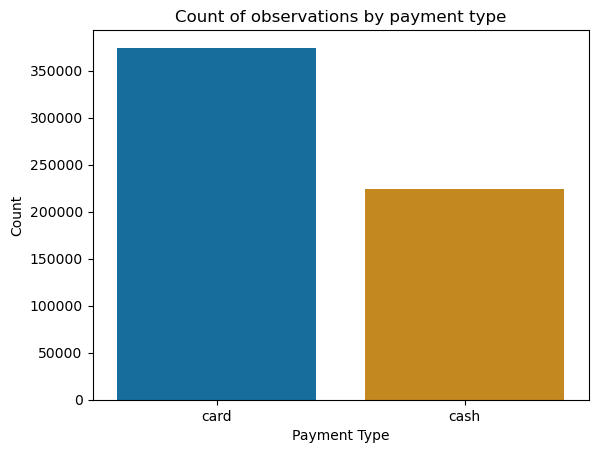

In [91]:
payment_counts = df1["payment_type"].value_counts()
payment_counts_df = payment_counts.reset_index()
payment_counts_df.columns = ["Payment Type","count"]

# create a bar plot
sns.barplot(x="Payment Type", y="count" , data=payment_counts_df,palette="colorblind") 
plt.xlabel("Payment Type")
plt.ylabel("Count")
plt.title("Count of observations by payment type")
plt.show()

In [93]:
corr = df1.corr(numeric_only=True)
corr

,passenger_count,trip_distance,fare_amount,tip_amount,total_amount,duration
passenger_count,1.000000,-0.000589,-0.002911,0.004087,-0.001147,-0.008556
trip_distance,-0.000589,1.000000,0.011668,0.002372,0.011896,0.001775
fare_amount,-0.002911,0.011668,1.000000,0.110975,0.979799,0.153707
tip_amount,0.004087,0.002372,0.110975,1.000000,0.281584,0.009361
total_amount,-0.001147,0.011896,0.979799,0.281584,1.000000,0.148690
duration,-0.008556,0.001775,0.153707,0.009361,0.148690,1.000000


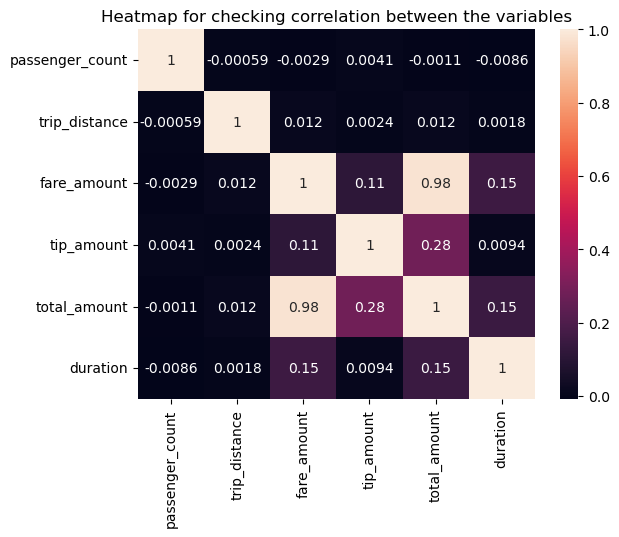

In [95]:
sns.heatmap(corr,annot=True,cmap=None)
plt.title("Heatmap for checking correlation between the variables")
plt.show()

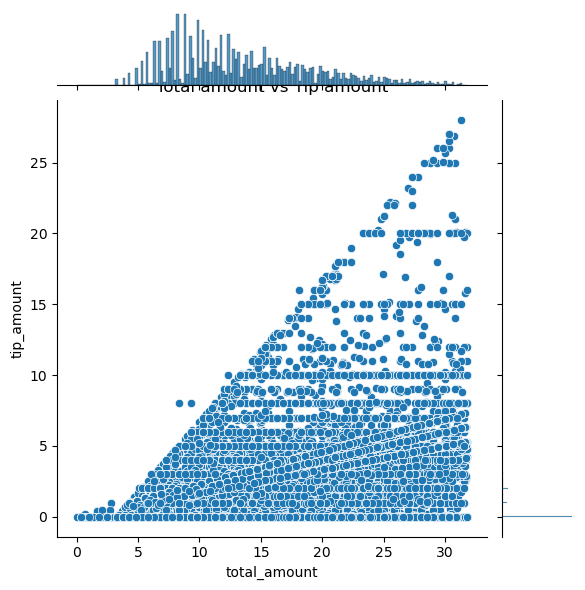

In [86]:
sns.jointplot(x="total_amount",y="tip_amount",data=df1,kind="scatter")
plt.title("Total amount vs Tip amount")
plt.show()

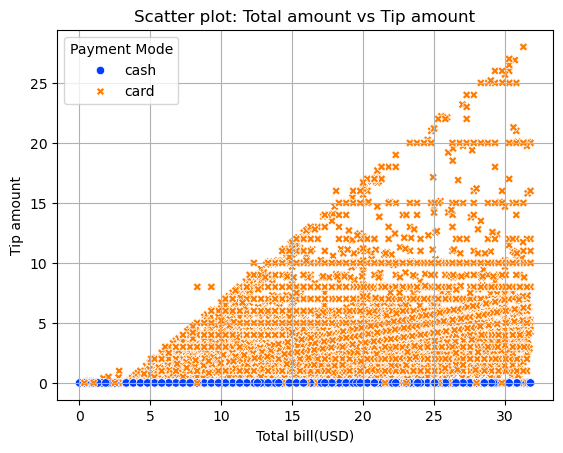

In [88]:
sns.scatterplot(x="total_amount",y="tip_amount",data=df1,palette="bright",hue="payment_type",style="payment_type")
plt.xlabel("Total bill(USD)")
plt.ylabel("Tip amount")
plt.title("Scatter plot: Total amount vs Tip amount")
plt.legend(title="Payment Mode")
plt.grid()
plt.show()

In [99]:
df1.groupby("payment_type").agg({"fare_amount":['mean','std'], "trip_distance":['mean','std']})

fare_amount            trip_distance            
                    mean        std          mean         std
payment_type                                                 
card           17.888848  17.124365      5.050315  412.767200
cash           13.353892  14.048998      3.454355  178.230277

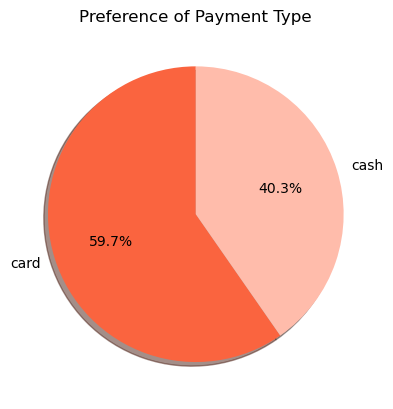

In [50]:
plt.title('Preference of Payment Type')
plt.pie(df['payment_type'].value_counts(normalize = True), labels = df['payment_type'].value_counts().index,
        startangle = 90,shadow = True, autopct = '%1.1f%%', colors = ['#FA643F', '#FFBCAB'])
plt.show()

In [69]:
passenger_count = df1.groupby(["payment_type","passenger_count"])[["passenger_count"]].count()
passenger_count.rename(columns = {'passenger_count': 'count'}, inplace = True)
passenger_count.reset_index(inplace = True)

passenger_count['perc'] = (passenger_count['count']/passenger_count['count'].sum())*100

passenger_count

,payment_type,passenger_count,count,perc
0,card,1,330293,55.215492
1,card,2,30002,5.015472
2,card,3,4630,0.774003
3,card,4,1868,0.312276
4,card,5,7484,1.251110
5,cash,1,193384,32.328244
6,cash,2,20508,3.428348
7,cash,3,3639,0.608336
8,cash,4,1040,0.173858
9,cash,5,5341,0.892862


In [71]:
df2 = pd.DataFrame(columns = ['payment_type', 1,2,3,4,5])
df2['payment_type'] = ['card', 'cash']
df2.iloc[0,1:] = passenger_count.iloc[0:5,-1]
df2.iloc[1,1:] = passenger_count.iloc[5:,-1]
df2


,payment_type,1,2,3,4,5
0,card,55.215492,5.015472,0.774003,0.312276,1.25111
1,cash,32.328244,3.428348,0.608336,0.173858,0.892862


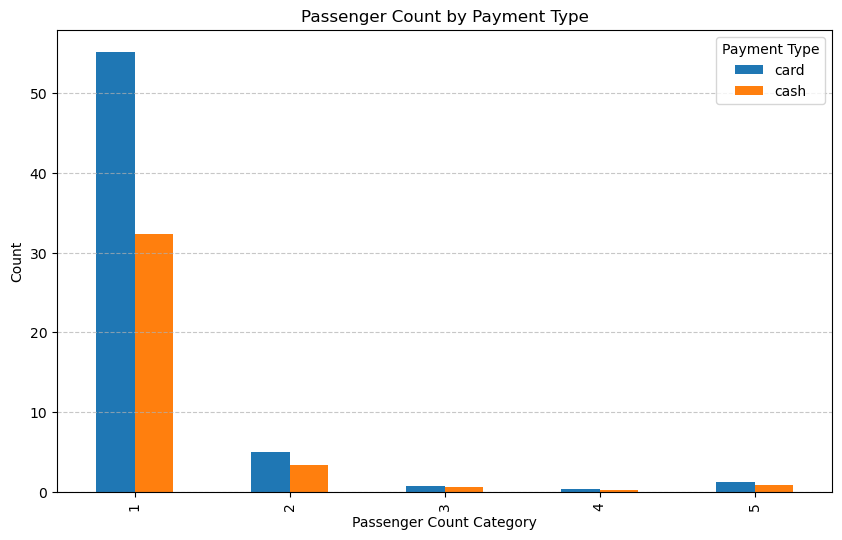

In [73]:
df2.set_index('payment_type').T.plot(kind='bar', figsize=(10, 6))
plt.title('Passenger Count by Payment Type')
plt.xlabel('Passenger Count Category')
plt.ylabel('Count')
plt.legend(title='Payment Type')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

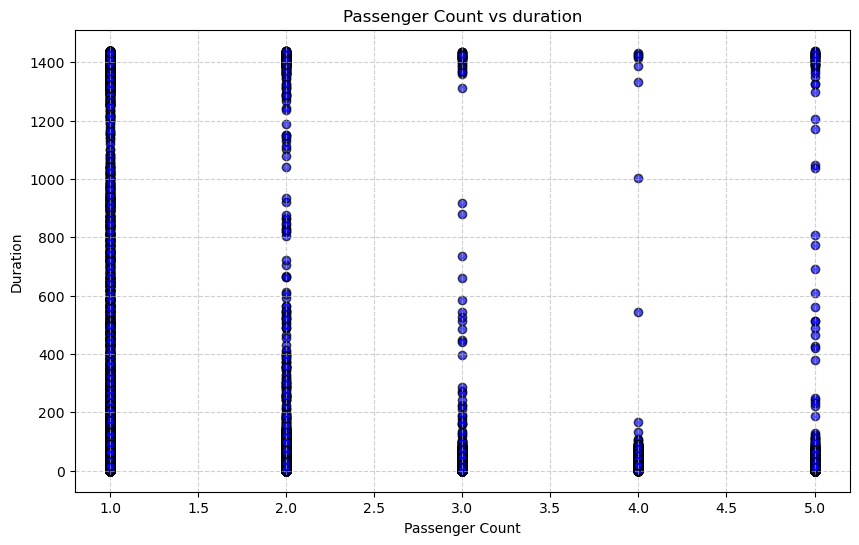

In [83]:
plt.figure(figsize=(10, 6))
plt.scatter(df1['passenger_count'], df1['duration'], color='b', alpha=0.7, edgecolors='k')
plt.title('Passenger Count vs duration')
plt.xlabel('Passenger Count')
plt.ylabel('Duration')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Hypothesis testing:-
Null hypothesis = There is no difference in average fare between customers who use card and customers who use cash.
Alternative hypothesis = There is difference in average fare between customers who use card and customers who use cash.

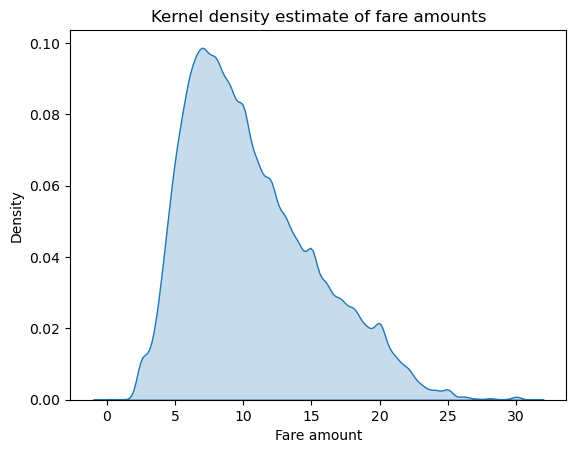

The mean of the fare amount: 10.55005403189745
From the above plot we can see that data is not normaly distributed


In [106]:
# Checking the distribution of the data
sns.kdeplot(df["fare_amount"],shade=True)
plt.xlabel("Fare amount")
plt.ylabel("Density")
plt.title("Kernel density estimate of fare amounts")
plt.show()
print("The mean of the fare amount:",df["fare_amount"].mean())
print("From the above plot we can see that data is not normaly distributed")

# T-test (hypothesis testing)

In [112]:
card_sample = df[df["payment_type"]=="card"]["fare_amount"]
cash_sample = df[df["payment_type"]=="cash"]["fare_amount"]

In [120]:
t_stats, p_value = stats.ttest_ind(a = card_sample, b = cash_sample ,equal_var = False)
print("The p-value is:",p_value)
print("The t-statistics is:",t_stats)
alpha = 0.05
if p_value <= 0.05:
    print("We reject the null hypothesis: It means that there is difference between the average mean of customers using cash and card ")
else:
    print("We failed to reject null hypothesis: It means that there is no difference between the average mean of customers using cash and card")

The p-value is: 0.0
The t-statistics is: 42.8830935835664
We reject the null hypothesis: It means that there is difference between the average mean of customers using cash and card 
